<a href="https://colab.research.google.com/github/9100Naveen/CSA4705-DL/blob/main/EXPERIMENTS_5_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 0: m = 0.4400, c = 0.1200, Cost = 44.000000
Iteration 100: m = 1.8988, c = 0.3655, Cost = 0.024474
Iteration 200: m = 1.9279, c = 0.2605, Cost = 0.012432
Iteration 300: m = 1.9486, c = 0.1856, Cost = 0.006315
Iteration 400: m = 1.9634, c = 0.1323, Cost = 0.003208
Iteration 500: m = 1.9739, c = 0.0943, Cost = 0.001630
Iteration 600: m = 1.9814, c = 0.0672, Cost = 0.000828
Iteration 700: m = 1.9867, c = 0.0479, Cost = 0.000420
Iteration 800: m = 1.9905, c = 0.0341, Cost = 0.000214
Iteration 900: m = 1.9933, c = 0.0243, Cost = 0.000108

✅ Final Equation: y = 1.9952x + 0.0174


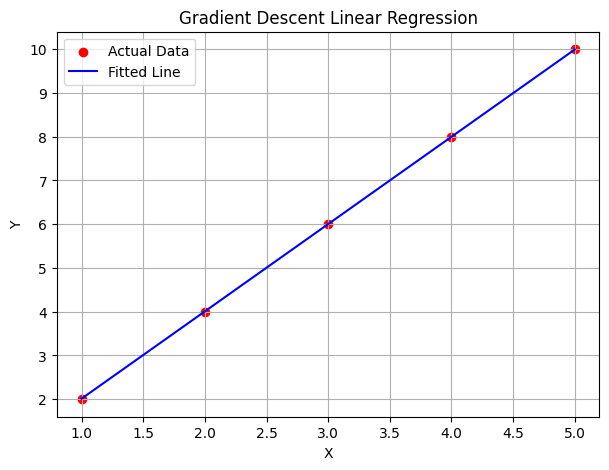

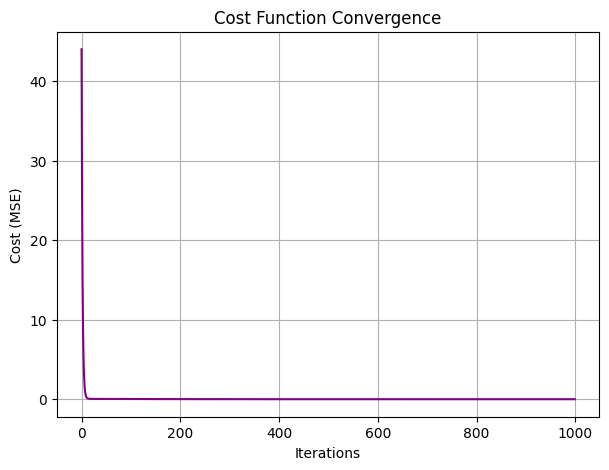

In [ ]:
#EXPERIMENT-5

# --------------------------------------------
# Demonstrating Gradient Descent Algorithm
# Using Python (Google Colab Compatible)
# --------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Sample Data (Simple Linear Relationship)
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 4, 6, 8, 10])  # y = 2x (perfect linear relation)

# 2️⃣ Initialize Parameters
m = 0       # slope
c = 0       # intercept
L = 0.01    # learning rate
epochs = 1000  # number of iterations
n = float(len(X))  # number of data points

# To store cost for visualization
cost_history = []

# 3️⃣ Gradient Descent Algorithm
for i in range(epochs):
    # Predicted value
    Y_pred = m * X + c

    # Compute gradients
    D_m = (-2/n) * sum(X * (Y - Y_pred))   # derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)         # derivative wrt c

    # Update parameters
    m = m - L * D_m
    c = c - L * D_c

    # Compute cost (MSE)
    cost = np.mean((Y - Y_pred)**2)
    cost_history.append(cost)

    # Print progress every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}: m = {m:.4f}, c = {c:.4f}, Cost = {cost:.6f}")

# 4️⃣ Final Results
print("\n✅ Final Equation: y = {:.4f}x + {:.4f}".format(m, c))

# 5️⃣ Plot Data and Regression Line
plt.figure(figsize=(7,5))
plt.scatter(X, Y, color='red', label='Actual Data')
plt.plot(X, m*X + c, color='blue', label='Fitted Line')
plt.title("Gradient Descent Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

# 6️⃣ Plot Cost Reduction over Iterations
plt.figure(figsize=(7,5))
plt.plot(range(epochs), cost_history, color='purple')
plt.title("Cost Function Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()


Saving Screenshot 2025-08-19 123839.png to Screenshot 2025-08-19 123839.png
Optimal threshold found by Otsu’s method: 184.00


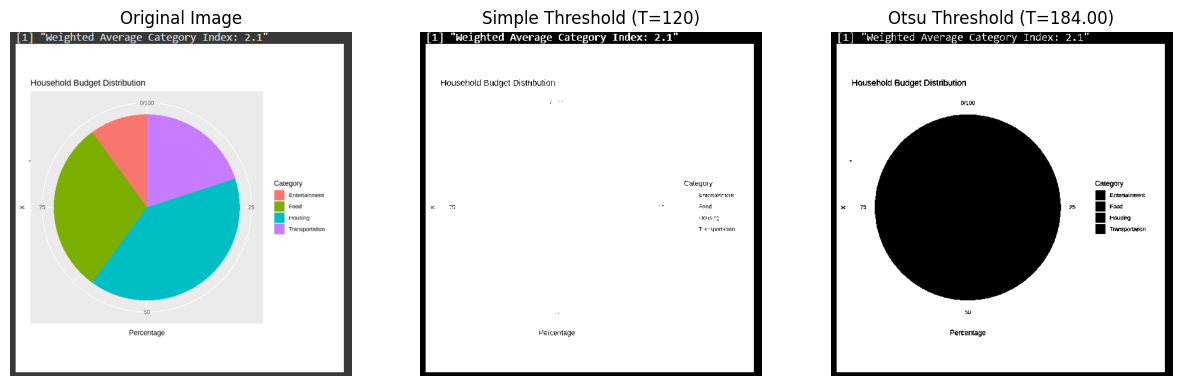

/tmp/ipython-input-3941930268.py:54: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray.ravel(), 256, [0,256], color='blue')


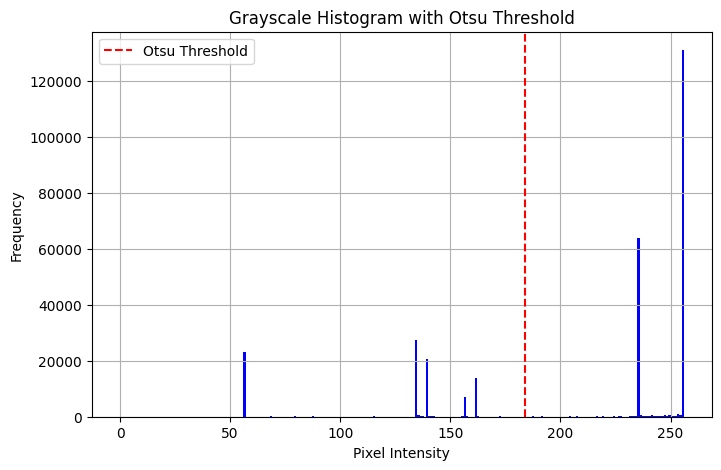

In [ ]:
#EXPERMENT-6

# ----------------------------------------------------
# Verifying Image Pre-Processing Performance
# using Otsu’s Thresholding (Python + OpenCV)
# ----------------------------------------------------

import cv2
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Load Image
# You can upload your image in Colab, or use a sample one
from google.colab import files
uploaded = files.upload()   # Upload your image file

image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2️⃣ Apply Simple Thresholding for comparison
_, thresh1 = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

# 3️⃣ Apply Otsu’s Thresholding
# The function automatically calculates the optimal threshold value
otsu_thresh_val, otsu_result = cv2.threshold(
    gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

print(f"Optimal threshold found by Otsu’s method: {otsu_thresh_val:.2f}")

# 4️⃣ Display the Results
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(thresh1, cmap='gray')
plt.title("Simple Threshold (T=120)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(otsu_result, cmap='gray')
plt.title(f"Otsu Threshold (T={otsu_thresh_val:.2f})")
plt.axis("off")

plt.show()

# 5️⃣ Plot Histogram and verify threshold separation
plt.figure(figsize=(8,5))
plt.hist(gray.ravel(), 256, [0,256], color='blue')
plt.axvline(x=otsu_thresh_val, color='red', linestyle='--', label='Otsu Threshold')
plt.title("Grayscale Histogram with Otsu Threshold")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


Saving Screenshot 2025-08-19 124729.png to Screenshot 2025-08-19 124729.png


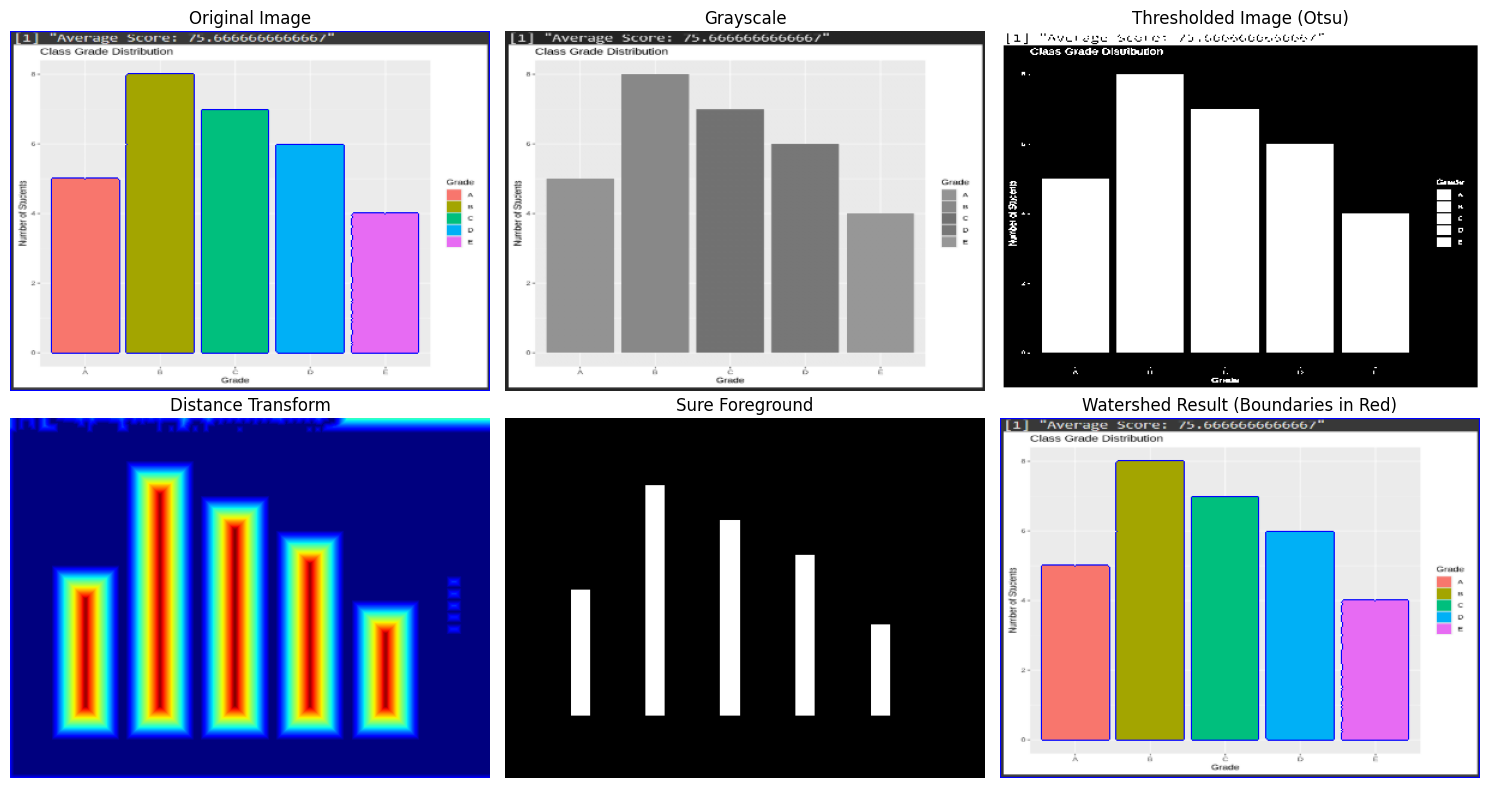

In [ ]:
##EXPERIMENT-7

# ------------------------------------------------------------
# Verifying Image Pre-Processing using Watershed Algorithm
# Compatible with Google Colab
# ------------------------------------------------------------

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 1️⃣ Upload an image file
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)
img = cv2.resize(img, (400, 300))  # Resize for better visualization

# 2️⃣ Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3️⃣ Apply thresholding
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 4️⃣ Noise removal using morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# 5️⃣ Define sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# 6️⃣ Define sure foreground area using distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# 7️⃣ Identify unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# 8️⃣ Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0
markers = markers + 1

# Mark unknown region as 0
markers[unknown == 255] = 0

# 9️⃣ Apply Watershed algorithm
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]  # Mark boundaries in red

# 🔟 Display Results
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Image (Otsu)")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(dist_transform, cmap='jet')
plt.title("Distance Transform")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(sure_fg, cmap='gray')
plt.title("Sure Foreground")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Watershed Result (Boundaries in Red)")
plt.axis('off')

plt.tight_layout()
plt.show()


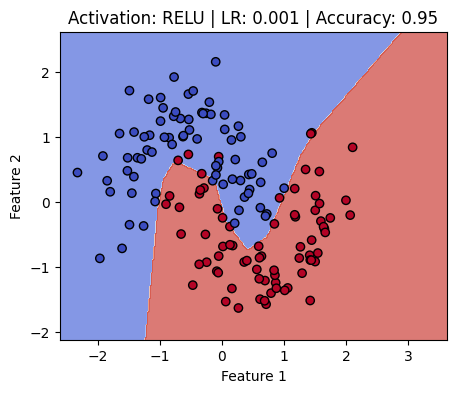

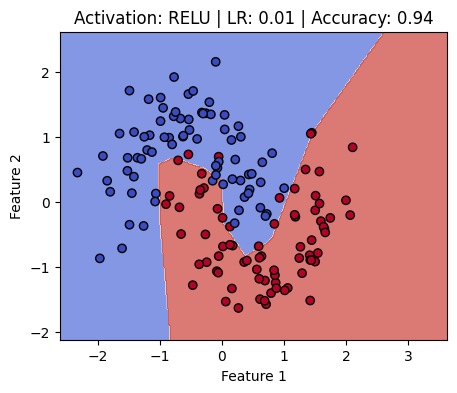

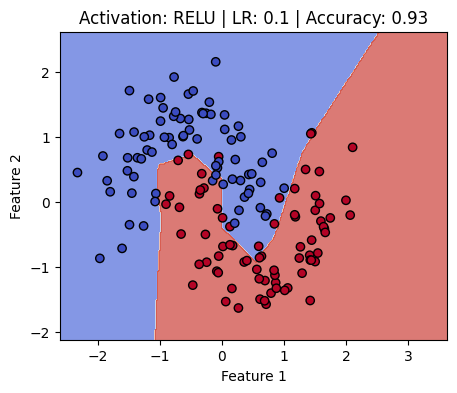

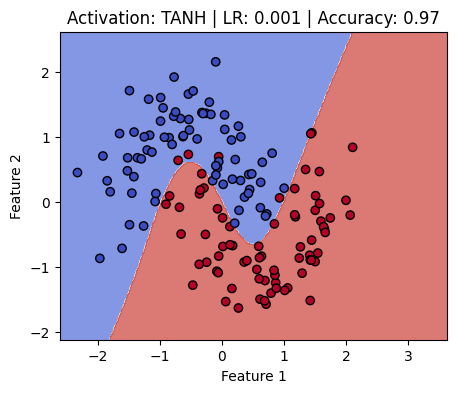

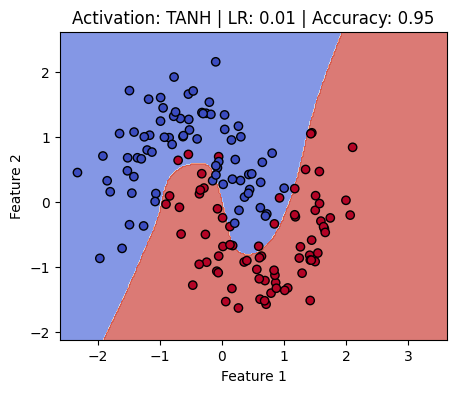

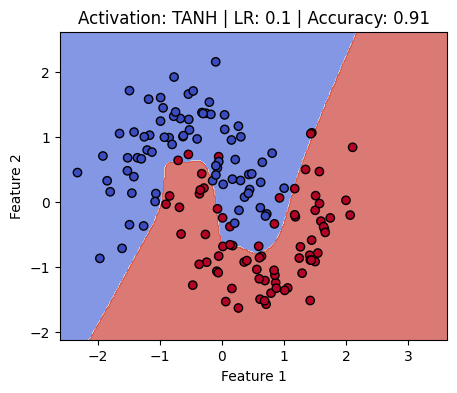

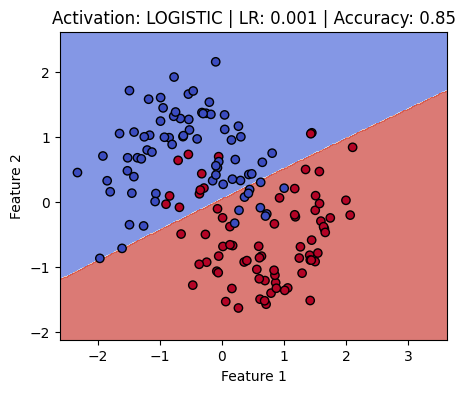

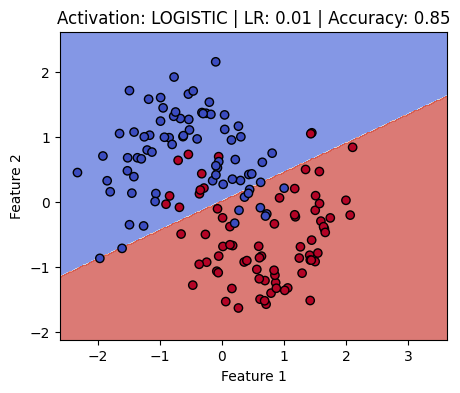

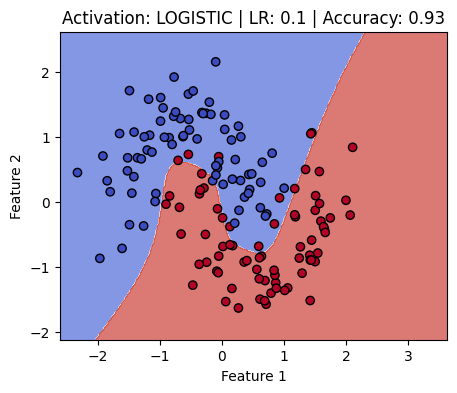

=== MLP Performance Summary ===
Activation = relu     | Learning Rate = 0.001  | Accuracy = 0.953
Activation = relu     | Learning Rate = 0.01   | Accuracy = 0.940
Activation = relu     | Learning Rate = 0.1    | Accuracy = 0.927
Activation = tanh     | Learning Rate = 0.001  | Accuracy = 0.973
Activation = tanh     | Learning Rate = 0.01   | Accuracy = 0.947
Activation = tanh     | Learning Rate = 0.1    | Accuracy = 0.913
Activation = logistic | Learning Rate = 0.001  | Accuracy = 0.853
Activation = logistic | Learning Rate = 0.01   | Accuracy = 0.847
Activation = logistic | Learning Rate = 0.1    | Accuracy = 0.927


In [ ]:
#

##EXPERIMENT-8
------------------------------------------------------------
# Constructing and Verifying MLP Model
# with Different Inputs, Learning Rates, and Activation Functions
# using Python (Google Colab)
# ------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 1️⃣ Select Dataset Type (like Neural Network Playground)
# Options: "moons", "circles", "linear"
dataset_type = "moons"  # change to "circles" or "linear"

if dataset_type == "moons":
    X, y = make_moons(n_samples=500, noise=0.25, random_state=42)
elif dataset_type == "circles":
    X, y = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)
else:
    X, y = make_classification(n_samples=500, n_features=2, n_redundant=0,
                               n_informative=2, random_state=42, n_clusters_per_class=1)

# 2️⃣ Data Preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3️⃣ Try Different Hyperparameters (like in Playground)
learning_rates = [0.001, 0.01, 0.1]
activations = ['relu', 'tanh', 'logistic']  # logistic = sigmoid

# 4️⃣ Train and Evaluate Each Model
results = {}

for act in activations:
    for lr in learning_rates:
        model = MLPClassifier(hidden_layer_sizes=(8, 8),
                              activation=act,
                              solver='adam',
                              learning_rate_init=lr,
                              max_iter=1000,
                              random_state=42)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        results[(act, lr)] = acc

        # 5️⃣ Visualize Decision Boundary
        h = 0.02
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(5,4))
        plt.contourf(xx, yy, Z, alpha=0.7, cmap=plt.cm.coolwarm)
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.coolwarm)
        plt.title(f"Activation: {act.upper()} | LR: {lr} | Accuracy: {acc:.2f}")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

# 6️⃣ Compare Performance of Different Settings
print("=== MLP Performance Summary ===")
for key, value in results.items():
    print(f"Activation = {key[0]:<8} | Learning Rate = {key[1]:<6} | Accuracy = {value:.3f}")


Hidden=(4,), LR=0.001, Act=relu, Accuracy=0.840
Hidden=(4,), LR=0.001, Act=tanh, Accuracy=0.840


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden=(4,), LR=0.001, Act=logistic, Accuracy=0.853
Hidden=(4,), LR=0.01, Act=relu, Accuracy=0.847
Hidden=(4,), LR=0.01, Act=tanh, Accuracy=0.853
Hidden=(4,), LR=0.01, Act=logistic, Accuracy=0.840
Hidden=(4,), LR=0.1, Act=relu, Accuracy=0.840
Hidden=(4,), LR=0.1, Act=tanh, Accuracy=0.940
Hidden=(4,), LR=0.1, Act=logistic, Accuracy=0.940
Hidden=(8,), LR=0.001, Act=relu, Accuracy=0.860
Hidden=(8,), LR=0.001, Act=tanh, Accuracy=0.860
Hidden=(8,), LR=0.001, Act=logistic, Accuracy=0.853
Hidden=(8,), LR=0.01, Act=relu, Accuracy=0.960
Hidden=(8,), LR=0.01, Act=tanh, Accuracy=0.953
Hidden=(8,), LR=0.01, Act=logistic, Accuracy=0.867
Hidden=(8,), LR=0.1, Act=relu, Accuracy=0.940
Hidden=(8,), LR=0.1, Act=tanh, Accuracy=0.947
Hidden=(8,), LR=0.1, Act=logistic, Accuracy=0.927
Hidden=(8, 8), LR=0.001, Act=relu, Accuracy=0.953
Hidden=(8, 8), LR=0.001, Act=tanh, Accuracy=0.973
Hidden=(8, 8), LR=0.001, Act=logistic, Accuracy=0.853
Hidden=(8, 8), LR=0.01, Act=relu, Accuracy=0.940
Hidden=(8, 8), LR=0.01,

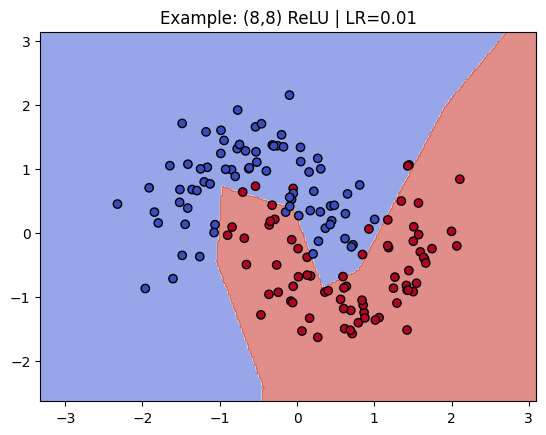


=== Performance Summary ===
   Hidden Layers     LR Activation  Accuracy
19        (8, 8)  0.001       tanh  0.973333
12          (8,)  0.010       relu  0.960000
18        (8, 8)  0.001       relu  0.953333
13          (8,)  0.010       tanh  0.953333
28      (16, 16)  0.001       tanh  0.953333
27      (16, 16)  0.001       relu  0.953333
16          (8,)  0.100       tanh  0.946667
31      (16, 16)  0.010       tanh  0.946667
22        (8, 8)  0.010       tanh  0.946667
32      (16, 16)  0.010   logistic  0.946667
33      (16, 16)  0.100       relu  0.940000
21        (8, 8)  0.010       relu  0.940000
15          (8,)  0.100       relu  0.940000
7           (4,)  0.100       tanh  0.940000
8           (4,)  0.100   logistic  0.940000
35      (16, 16)  0.100   logistic  0.933333
24        (8, 8)  0.100       relu  0.926667
30      (16, 16)  0.010       relu  0.926667
34      (16, 16)  0.100       tanh  0.926667
26        (8, 8)  0.100   logistic  0.926667
17          (8,)  0.100   

In [ ]:
# ## EXPERIMET-9------------------------------------------------------------
# Performance Evaluation of Neural Network Architecture
# Using MLPClassifier (Sklearn) in Google Colab
# ------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# 1️⃣ Dataset (non-linear pattern similar to Playground)
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2️⃣ Parameter Grids
hidden_layers = [(4,), (8,), (8,8), (16,16)]
learning_rates = [0.001, 0.01, 0.1]
activations = ['relu', 'tanh', 'logistic']

results = []

# 3️⃣ Evaluate all configurations
for hl in hidden_layers:
    for lr in learning_rates:
        for act in activations:
            mlp = MLPClassifier(hidden_layer_sizes=hl, activation=act,
                                learning_rate_init=lr, max_iter=1000,
                                solver='adam', random_state=42)
            mlp.fit(X_train, y_train)
            y_pred = mlp.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            results.append((hl, lr, act, acc))
            print(f"Hidden={hl}, LR={lr}, Act={act}, Accuracy={acc:.3f}")

# 4️⃣ Visualize one example decision boundary
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

# Example Visualization
model_example = MLPClassifier(hidden_layer_sizes=(8,8), activation='relu', learning_rate_init=0.01, max_iter=1000)
model_example.fit(X_train, y_train)
plot_decision_boundary(model_example, X_test, y_test, "Example: (8,8) ReLU | LR=0.01")

# 5️⃣ Summary Table
import pandas as pd
df = pd.DataFrame(results, columns=["Hidden Layers", "LR", "Activation", "Accuracy"])
df.sort_values(by="Accuracy", ascending=False, inplace=True)
print("\n=== Performance Summary ===")
print(df)


Dataset Loaded: IRIS
Features: 4 | Classes: 3

✅ Model Accuracy: 100.00%

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



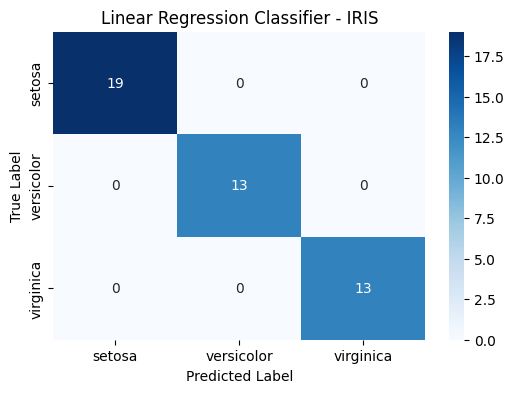

In [ ]:
#
##EXPERIMET-10 ------------------------------------------------------------
# Performance Evaluation of Linear Regression Classifier
# Using Iris or Breast Cancer Dataset
# ------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 1️⃣ Select dataset: 'iris' or 'breast_cancer'
dataset_choice = 'iris'   # Change to 'breast_cancer' to test that dataset

if dataset_choice == 'iris':
    data = datasets.load_iris()
else:
    data = datasets.load_breast_cancer()

X = data.data
y = data.target
target_names = data.target_names

print(f"Dataset Loaded: {dataset_choice.upper()}")
print("Features:", X.shape[1], "| Classes:", len(np.unique(y)))

# 2️⃣ Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3️⃣ Standardize features (important for regression-based models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4️⃣ Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 5️⃣ Predict (Continuous output → convert to class labels)
y_pred_continuous = model.predict(X_test)
y_pred = np.round(y_pred_continuous).astype(int)

# Ensure predictions are within valid label range
y_pred = np.clip(y_pred, 0, len(np.unique(y)) - 1)

# 6️⃣ Evaluate Model Performance
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=target_names)

print(f"\n✅ Model Accuracy: {acc * 100:.2f}%")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# 7️⃣ Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=target_names, yticklabels=target_names)
plt.title(f"Linear Regression Classifier - {dataset_choice.upper()}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
